# 関東学生マーケティング大会

## データ対応表

In [1]:
read.csv("input/426200000002_Layout.txt", sep="\t", fileEncoding="cp932", skip=1)

質問番号,質問タイプ,アイテム名,ラベル,回答タイプ,カテゴリ数,カラム,選択肢番号,質問文.選択肢
<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>
,,MID,MID,MID,NA,1,NA,回答者ID
,,DAY,DAY,D,NA,2,NA,回答日時
SEX,S,SEX,SEX,SA,2,3,NA,性別
,,,,,NA,NA,1,男性
,,,,,NA,NA,2,女性
AGE,NUM,AGE,AGE,NUM,NA,4,NA,年齢(歳)
GEN,S,GEN,GEN,SA,7,5,NA,年齢
,,,,,NA,NA,1,15歳未満
,,,,,NA,NA,2,15歳〜19歳


 ## データの読み込み

In [31]:
df <- read.csv("input/426200000002_Rawdata.txt", sep="\t")
df

MID,DAY,SEX,AGE,GEN,PRE,ARE,JOB,MAR,CHI,⋯,q3s1,q3s2,q3s3,q3s4,q3s5,q4s1,q4s2,q4s3,q4s4,q4s5
<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1000003719,2020/10/09 20:58,2,46,5,13,3,7,1,2,⋯,6,6,3,3,5,2,2,2,2,2
1000020349,2020/10/10 08:20,2,47,5,14,3,8,2,1,⋯,3,6,6,6,2,1,2,3,3,3
1000031002,2020/10/09 18:16,1,47,5,14,3,4,1,2,⋯,1,1,6,2,6,2,2,1,2,2
1000036392,2020/10/09 19:59,1,45,5,13,3,4,2,1,⋯,4,6,1,4,6,1,2,2,2,2
1000040558,2020/10/09 17:59,2,38,4,29,5,8,2,1,⋯,1,6,1,5,5,3,3,3,3,3
1000049046,2020/10/09 18:43,1,49,5,28,5,4,2,1,⋯,1,6,6,6,6,1,3,2,3,1
1000052816,2020/10/10 08:37,2,45,5,11,3,9,2,1,⋯,1,6,4,5,5,4,4,3,3,3
1000052818,2020/10/09 18:21,1,42,5,14,3,3,2,2,⋯,2,1,1,5,5,1,2,2,1,1
1000103312,2020/10/09 18:25,1,40,5,13,3,3,1,2,⋯,1,1,1,1,1,3,3,1,1,2


In [15]:
colnames(df)

[1] "MID"  "DAY"  "SEX"  "AGE"  "GEN"  "PRE"  "ARE"  "JOB"  "MAR"  "CHI" 
[11] "q1"   "q2"   "q3s1" "q3s2" "q3s3" "q3s4" "q3s5" "q4s1" "q4s2" "q4s3"
[21] "q4s4" "q4s5"

In [16]:
library(tidyverse)

In [17]:
usedf <- df %>%
    select(-c(DAY, GEN, PRE, ARE, JOB, MAR, CHI, q1, q2))
usedf

MID,SEX,AGE,q3s1,q3s2,q3s3,q3s4,q3s5,q4s1,q4s2,q4s3,q4s4,q4s5
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1000003719,2,46,6,6,3,3,5,2,2,2,2,2
1000020349,2,47,3,6,6,6,2,1,2,3,3,3
1000031002,1,47,1,1,6,2,6,2,2,1,2,2
1000036392,1,45,4,6,1,4,6,1,2,2,2,2
1000040558,2,38,1,6,1,5,5,3,3,3,3,3
1000049046,1,49,1,6,6,6,6,1,3,2,3,1
1000052816,2,45,1,6,4,5,5,4,4,3,3,3
1000052818,1,42,2,1,1,5,5,1,2,2,1,1
1000103312,1,40,1,1,1,1,1,3,3,1,1,2


In [18]:
d.q <- df %>%
    select(starts_with("q")) %>%
    select(-c(q1, q2))
d.q

q3s1,q3s2,q3s3,q3s4,q3s5,q4s1,q4s2,q4s3,q4s4,q4s5
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
6,6,3,3,5,2,2,2,2,2
3,6,6,6,2,1,2,3,3,3
1,1,6,2,6,2,2,1,2,2
4,6,1,4,6,1,2,2,2,2
1,6,1,5,5,3,3,3,3,3
1,6,6,6,6,1,3,2,3,1
1,6,4,5,5,4,4,3,3,3
2,1,1,5,5,1,2,2,1,1
1,1,1,1,1,3,3,1,1,2


In [19]:
summary(d.q)

      q3s1            q3s2            q3s3            q3s4           q3s5      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.00   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:2.000   1st Qu.:1.000   1st Qu.:1.00   1st Qu.:4.000  
 Median :1.000   Median :6.000   Median :1.000   Median :2.00   Median :5.000  
 Mean   :1.923   Mean   :4.487   Mean   :2.643   Mean   :2.69   Mean   :4.673  
 3rd Qu.:2.000   3rd Qu.:6.000   3rd Qu.:6.000   3rd Qu.:4.00   3rd Qu.:6.000  
 Max.   :6.000   Max.   :6.000   Max.   :6.000   Max.   :6.00   Max.   :6.000  
      q4s1           q4s2           q4s3           q4s4            q4s5      
 Min.   :1.00   Min.   :1.00   Min.   :1.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.00   1st Qu.:2.00   1st Qu.:2.00   1st Qu.:2.000   1st Qu.:2.000  
 Median :3.00   Median :3.00   Median :2.00   Median :2.000   Median :2.000  
 Mean   :2.51   Mean   :2.67   Mean   :2.32   Mean   :2.343   Mean   :2.317  
 3rd Qu.:3.00   3rd Qu.:3.00   3rd Qu.:3.00   3rd 

## メディアデータのみ抽出

In [20]:
# TV
d.tv <- usedf %>%
    select(q3s1, q4s1)
# 新聞
d.np <- usedf %>%
    select(q3s2, q4s2)
# SNS
d.sns <- usedf %>%
    select(q3s3, q4s3)
# 動画共有サイト
d.ms <- usedf %>%
    select(q3s4, q4s4)
# 情報共有サイト
d.is <- usedf %>%
    select(q3s5, q4s5)

 ## 信頼度

In [21]:
q4 <- usedf %>%
    select(starts_with("q4"))

In [22]:
q4

q4s1,q4s2,q4s3,q4s4,q4s5
<int>,<int>,<int>,<int>,<int>
2,2,2,2,2
1,2,3,3,3
2,2,1,2,2
1,2,2,2,2
3,3,3,3,3
1,3,2,3,1
4,4,3,3,3
1,2,2,1,1
3,3,1,1,2


In [38]:
# メディアグループの作成
fac.name <- data.frame(name = c("TV", "NP", "SNS", "MS", "IS"))
levels <- as.vector(fac.name[,1])
ana.data$order <- factor(ana.data$group, levels=levels, labels=letters[1:ncol(q4)])

ERROR: Error in factor(ana.data$group, levels = levels, labels = letters[1:ncol(q4)]): object 'ana.data' not found


In [44]:
# 
df.ana <- q4[,1:3]
df.ana$trust <- q4$q4s1[1:ncol(q4)]

In [48]:
rep(1:5, each=nrow(q4))

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [297] 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [334] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [371] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [408] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [445] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [482] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [519] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [556] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [593] 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [630] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [667] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [704] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [741] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [778] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [815] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [852] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [889] 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [926] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [963] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1000] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1037] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1074] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1111] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1148] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[1185] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[1222] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[1259] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[1296] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[1333] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[1370] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[1407] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[1444] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
[1481] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5

### 分散分析用データの読み込み

In [60]:
ana.data <- read.csv("input/426200000002_Rawdata_ana.txt", sep="\t")

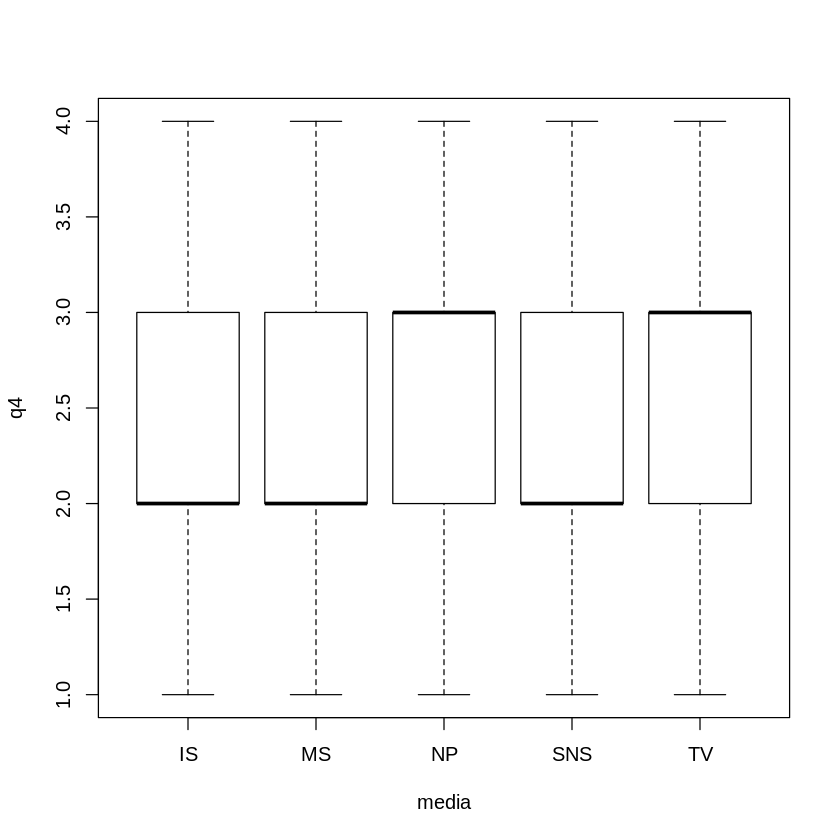

In [61]:
plot(q4 ~ media, data = ana.data)

In [63]:
ana.data$media <- factor(ana.data$media, levels=c("TV", "NP", "SNS", "MS", "IS"))

In [74]:
ana.des <- ana.data %>% 
    group_by(media) %>%
    summarize(mean = mean(q4), se = sd(q4)/sqrt(length(q4)))

`summarise()` ungrouping output (override with `.groups` argument)



In [79]:
ana.des <- data.frame(ana.des)

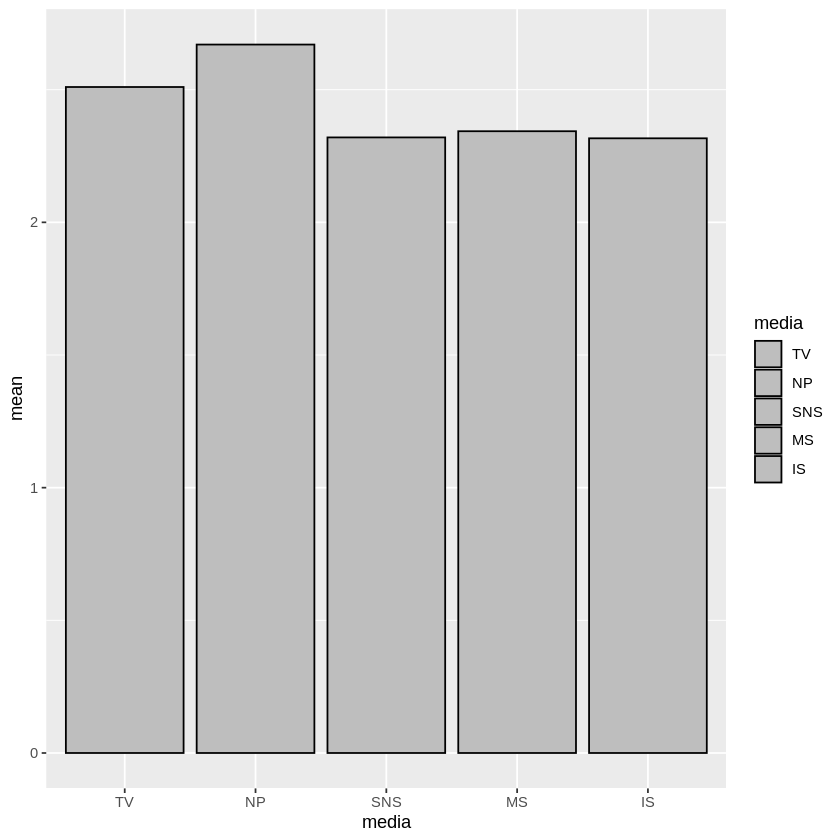

In [92]:
bp <- ggplot(ana.des,
           aes(x = media,
               y = mean,
               fill = media
               )
           )

bp <- bp + geom_bar(stat="identity", colour="black", position=position_dodge())
bp <- bp + scale_fill_manual(values=c("gray","gray","gray","gray","gray"))
bp

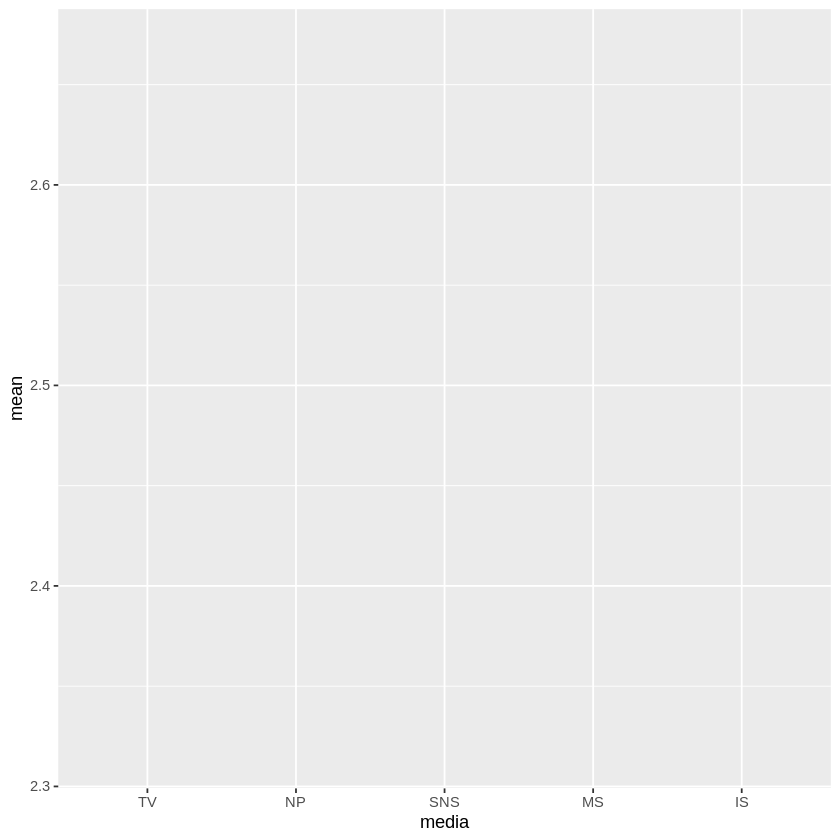

In [81]:
bp

In [65]:
TukeyHSD(aov(q4~media, data=ana.data))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = q4 ~ media, data = ana.data)

$media
               diff         lwr          upr     p adj
NP-TV   0.160000000 -0.03854378  0.358543784 0.1798414
SNS-TV -0.190000000 -0.38854378  0.008543784 0.0683945
MS-TV  -0.166666667 -0.36521045  0.031877117 0.1477527
IS-TV  -0.193333333 -0.39187712  0.005210450 0.0606444
SNS-NP -0.350000000 -0.54854378 -0.151456216 0.0000160
MS-NP  -0.326666667 -0.52521045 -0.128122883 0.0000738
IS-NP  -0.353333333 -0.55187712 -0.154789550 0.0000128
MS-SNS  0.023333333 -0.17521045  0.221877117 0.9977052
IS-SNS -0.003333333 -0.20187712  0.195210450 0.9999990
IS-MS  -0.026666667 -0.22521045  0.171877117 0.9961420


### TV

### 新聞

### SNS

### 動画共有サイト

### 情報共有サイト